In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def f(x):
    return math.cos(4 * math.pi * x)

In [14]:
def interpolateLagrangePolynomial(x, x_values, y_values):
    n = len(x_values)
    value = 0.0

    for i in range(n):
        l = 1.0
        for j in range(n):
            if j != i:
                l *= ((x - x_values[j]) / (x_values[i] - x_values[j]))
        value += y_values[i] * l
    
    return value

In [15]:
def coeffNewton(k, x_values, y_values):
    coeff = 0.0
    
    for i in range(0, k + 1):
        m = 1.0
        
        for j in range(0, k + 1):
            if i != j:
                m *= (x_values[i] - x_values[j])
                
        coeff += y_values[i] / m

    return coeff

def interpolateNewtonPolynomial(x, x_values, y_values):
    n = len(x_values)
    s = 0.0
    
    for k in range(1, n):
        m = 1.0
        
        for i in range(0, k):
            m *= (x - x_values[i])
            
        s += coeffNewton(k, x_values, y_values) * m
    
    return y_values[0] + s

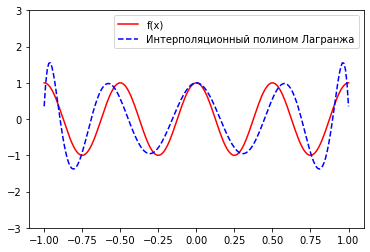

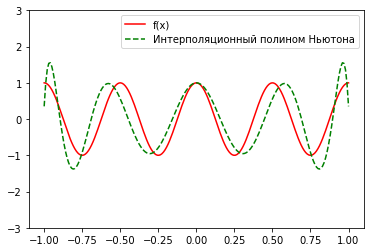

In [24]:
is_optimal = True # Выбрать оптимальные точки
x0 = -1.0         # Начало промежутка
x1 = 1.0          # Конец промежутка
h = 0.01          # Шаг (для отрисовки исходной функции)
n = 11            # Количество точек интерполяции

count = int((x1 - x0) / h)
X = np.linspace(x0, x1, count)
Y = [f(x) for x in X]

if is_optimal:
    X_DATA = [0.5 * (x0 + x1) + 0.5 * (x1 - x0) * math.cos((2 * k + 1) * math.pi / (2 * n)) for k in range(0, n)]
else:
    delta = (x1 - x0) / (n - 1)
    X_DATA = [x0 + delta * i for i in range(0, n)]
Y_DATA = [f(x) for x in X_DATA]

# Лагранж
YL = [interpolateLagrangePolynomial(x, X_DATA, Y_DATA) for x in X]

plt.ylim(-3, 3)
plt.plot(X, Y, color='red', linestyle='solid', label='f(x)')
plt.plot(X, YL, color='blue', linestyle='dashed', label='Интерполяционный полином Лагранжа')
plt.legend()
plt.show()

# Ньютон
YN = [interpolateNewtonPolynomial(x, X_DATA, Y_DATA) for x in X]

plt.ylim(-3, 3)
plt.plot(X, Y, color='red', linestyle='solid', label='f(x)')
plt.plot(X, YN, color='green', linestyle='dashed', label='Интерполяционный полином Ньютона')
plt.legend()
plt.show()